# **Mass Shootings Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/StanfordGeospatialCenter/MSA/master/Data/Stanford_MSA_Database.csv'
shootings = pd.read_csv(url)


In [2]:
shootings

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,Number of Enforcement Injured,Total Number of Fatalities,Total Number of Victims,Description,Date,Day of Week,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Number of Shotguns,Number of Rifles,Number of Handguns,Total Number of Guns,Number of Automatic Guns,Number of Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,History of Mental Illness - Detailed,History of Mental Illness - General,Data Source 1,Data Source 2,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class,Depreciation,Notes,Edit Date
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,0,16,48,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Monday,"Monday, August 01, 1966",Charles S. Whitman,1,25,25,Male,White American or European American,"Remington 700 ADL (6mm), Universal M1 carbine,...",Multiple guns,1,3,3,7,0,1,Deceased,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,"Family, students, teachers, and police",General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes,http://en.wikipedia.org/wiki/Charles_Whitman,"Lexington Examiner (KY) - September 23, 2012",http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK,1,NaN,6/8/2016
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,0,5,6,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Saturday,"Saturday, November 12, 1966",Robert Benjamin Smith,1,18,18,Male,White American or European American,.22 caliber pistol,Handgun,0,0,1,1,0,0,Custody,Custody,Not applicable,Yes,College/University/Adult education,None,"Four beauty school students, one client, and h...",Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes,"""Slaughter In The College Of Beauty."" Time 88....",Section: Lexington True Crime Examiner,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS,1,NaN,6/8/2016
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,5,10,22,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/1972,Sunday,"Sunday, December 31, 1972",Mark James Robert Essex,1,23,23,Male,Black American or African American,5-shot Ruger Model 44 (.44 caliber) semi-autom...,Multiple guns,0,1,1,2,0,1,Deceased,Deceased,Killed,No,Government facility,Local government,Police officers and members of the public,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes,http://news.google.com/newspapers?nid=1144&dat...,http://theadvocate.com/home/4828836-125/rampag...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK,1,NaN,6/22/2016
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,0,1,4,"On January 17, 1974, a 14-year-old student ent...",1/17/1974,Thursday,"Thursday, January 17, 1974",Steven Guy,1,14,14,Male,Unknown,".38 caliber snub-nose revolver, .45 caliber pi...",Handgun,0,0,2,2,0,0,Custody,Custody,Not applicable,Yes,Primary school,Place of schooling,"School principal, teachers, and school guard",Students/Classmates/Teacher,"Former student, upset at being 

#Average Number of Injuries/Deaths

In [3]:
shootings.mean()

CaseID                              171.856716
Latitude                             36.917703
Longitude                           -93.785049
Number of Civilian Fatalities         3.504478
Number of Civilian Injured            4.119403
Number of Enforcement Fatalities      0.068657
Number of Enforcement Injured         0.113433
Total Number of Fatalities            3.973134
Total Number of Victims               7.808955
Depreciation                          1.005970
dtype: float64

In [4]:
state_victims = shootings.groupby('State')['Total Number of Victims'].sum().reset_index()
state_victims_list = []
guns_victims = []
states =[]
victims = []

for i in state_victims.index:
  #print(state_victims['State'][i], state_victims['Total Number of Victims'][i])
  state_victims_list.append((state_victims['State'][i], state_victims['Total Number of Victims'][i]))
  states.append(state_victims['State'][i])
  victims.append(state_victims['Total Number of Victims'][i])

state_victims_list


[('Alabama', 75),
 ('Alaska', 4),
 ('Arizona', 80),
 ('Arkansas', 18),
 ('California', 352),
 ('Colorado', 136),
 ('Connecticut', 43),
 ('Delaware', 4),
 ('District of Columbia', 15),
 ('Florida', 274),
 ('Georgia', 105),
 ('Hawaii', 7),
 ('Idaho', 4),
 ('Illinois', 89),
 ('Indiana', 9),
 ('Iowa', 6),
 ('Kansas', 34),
 ('Kentucky', 45),
 ('Louisiana', 62),
 ('Maine', 3),
 ('Maryland', 15),
 ('Massachusetts', 34),
 ('Michigan', 61),
 ('Minnesota', 35),
 ('Mississippi', 32),
 ('Missouri', 23),
 ('Montana', 8),
 ('Nebraska', 25),
 ('Nevada', 30),
 ('New Jersey', 17),
 ('New Mexico', 19),
 ('New York', 102),
 ('North Carolina', 48),
 ('Ohio', 50),
 ('Oklahoma', 36),
 ('Oregon', 58),
 ('Pennsylvania', 52),
 ('South Carolina', 45),
 ('South Dakota', 5),
 ('Tennessee', 39),
 ('Texas', 256),
 ('Utah', 12),
 ('Vermont', 4),
 ('Virginia', 88),
 ('Washington', 94),
 ('West Virginia', 4),
 ('Wisconsin', 55),
 ('Wyoming', 4)]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]


Text(0, 0.5, 'Total Victims')

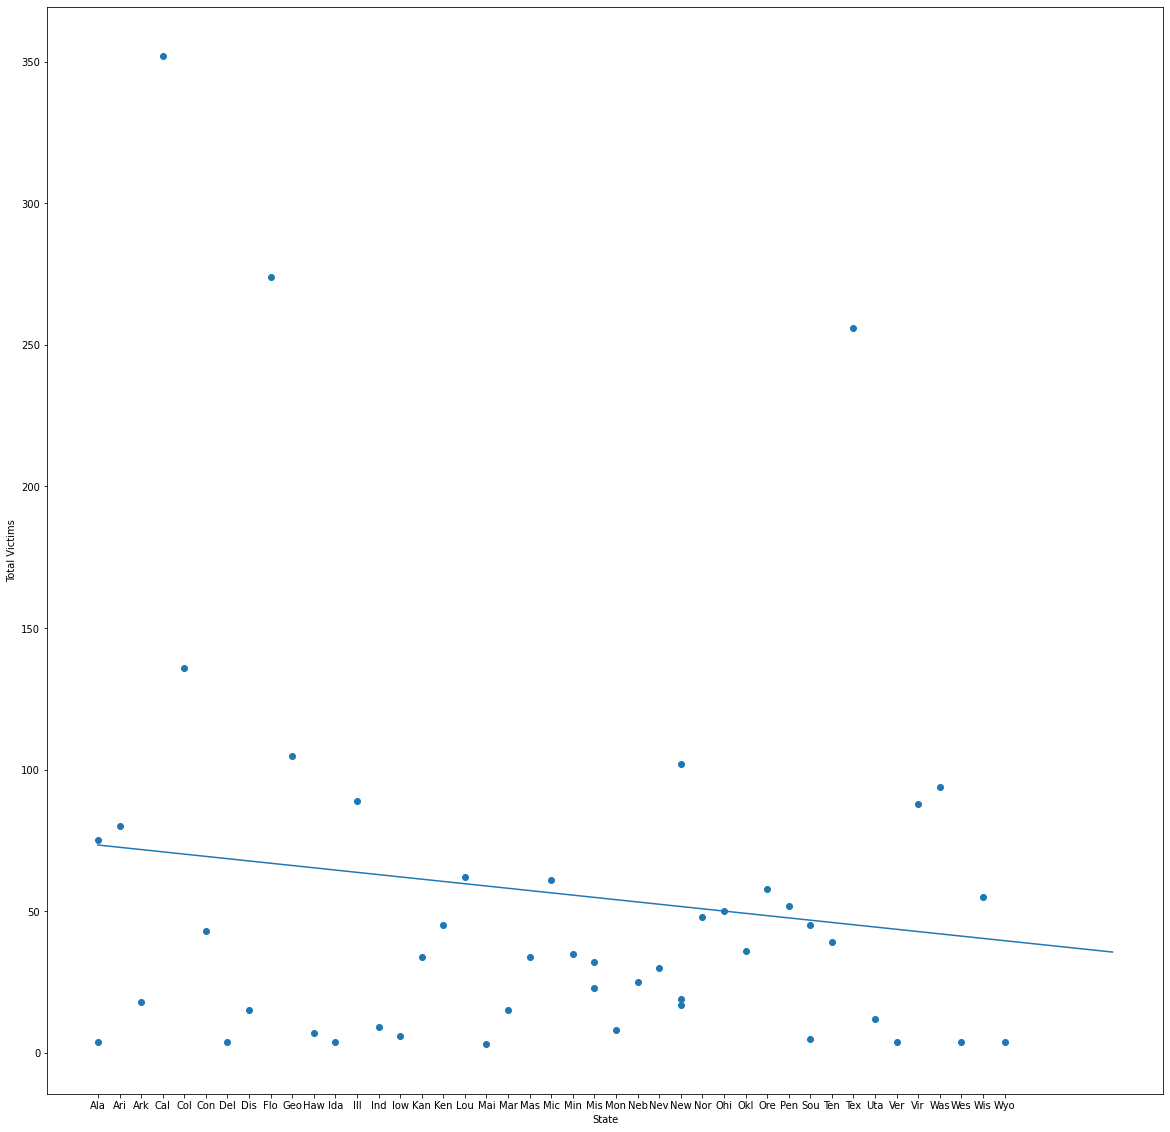

In [5]:
# plt.bar(state_victims['State'], state_victims["Total Number of Victims"])
#plt.plot(state_victims['State'], state_victims["Total Number of Victims"])
# plt.scatter(state_victims['State'], state_victims["Total Number of Victims"])
state_abr = [state[0:3] for state in states]
plt.figure(figsize=(20, 20))#len(victims)))
plt.scatter(state_abr, victims)

# plot regression line
x = np.array([i for i in range(len(states))])
print(x)
m, b = np.polyfit(x, victims, 1)
plt.plot(x, m*x + b)

plt.xlabel('State')
plt.ylabel('Total Victims')

[('0', 4), ('1', 6), ('1', 8), ('1', 9), ('1', 11), ('1', 7), ('1', 3), ('1', 11), ('1', 4), ('1', 7), ('1', 3), ('1', 4), ('1', 6), ('1', 11), ('1', 4), ('1', 4), ('1', 6), ('1', 9), ('1', 6), ('1', 4), ('1', 6), ('1', 6), ('1', 3), ('1', 25), ('1', 5), ('1', 3), ('1', 4), ('1', 27), ('1', 4), ('1', 4), ('1', 5), ('1', 3), ('1', 6), ('1', 3), ('1', 4), ('1', 7), ('1', 9), ('1', 3), ('1', 6), ('1', 4), ('1', 4), ('1', 6), ('1', 7), ('1', 4), ('1', 15), ('1', 6), ('1', 6), ('1', 8), ('1', 11), ('1', 11), ('1', 7), ('1', 4), ('1', 10), ('1', 7), ('1', 4), ('1', 12), ('1', 7), ('1', 3), ('1', 3), ('1', 6), ('1', 19), ('1', 4), ('1', 9), ('1', 11), ('1', 4), ('1', 6), ('1', 10), ('1', 5), ('1', 6), ('1', 10), ('1', 8), ('1', 7), ('1', 3), ('1', 6), ('1', 6), ('1', 4), ('1', 3), ('1', 5), ('1', 6), ('1', 6), ('1', 4), ('1', 8), ('1', 8), ('1', 19), ('1', 6), ('1', 3), ('1', 4), ('1', 5), ('1', 3), ('1', 6), ('1', 7), ('1', 4), ('1', 4), ('1', 5), ('1', 3), ('1', 3), ('1', 8), ('1', 4), ('1'

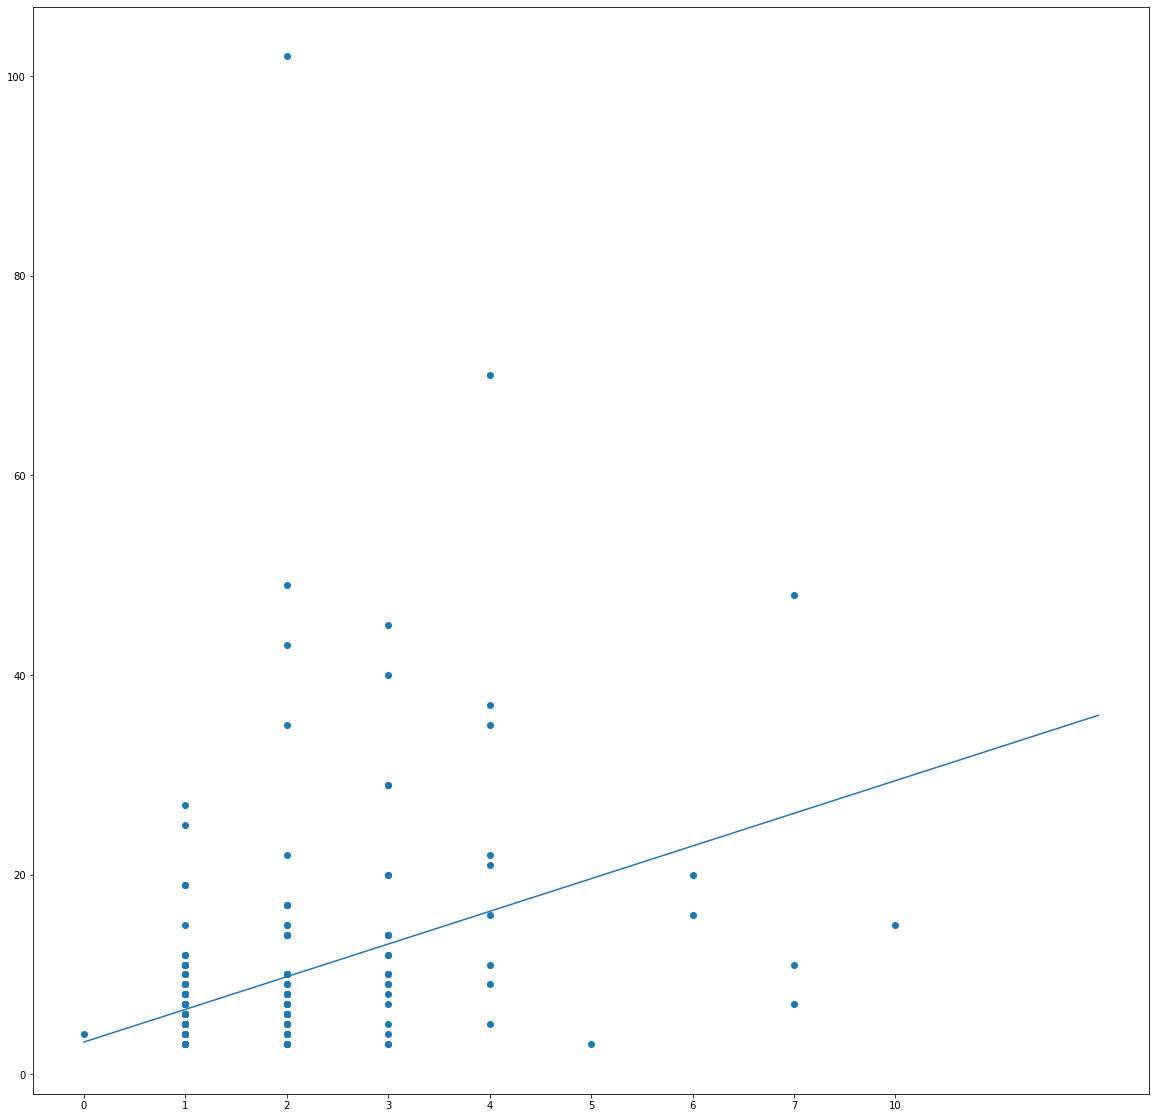

In [22]:
num_guns = shootings["Total Number of Guns"]
num_victims = shootings["Total Number of Victims"]

victims_cleaned = []
guns_cleaned = []
guns_victims_tuples = []

for guns, victims in zip(num_guns, num_victims):
    if not guns == 'Unknown':
      guns_cleaned.append(guns)
      victims_cleaned.append(victims)
      guns_victims_tuples.append((guns, victims))
  
guns_victims_tuples = sorted(guns_victims_tuples, key=lambda x: int(x[0]))
print(guns_victims_tuples)

plt.figure(figsize=(20, 20))
plt.scatter([element[0] for element in guns_victims_tuples], [element[1] for element in guns_victims_tuples])

# plot regression line
victims_regr = np.array([float(element[0]) for element in guns_victims_tuples]).astype(float)
m, b = np.polyfit(victims_regr, [float(element[1]) for element in guns_victims_tuples], 1)
plt.plot(victims_regr, m*victims_regr + b)


<BarContainer object of 273 artists>

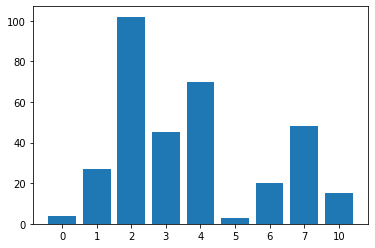

In [12]:
plt.bar([element[0] for element in guns_victims_tuples], [element[1] for element in guns_victims_tuples])

###Using Scikit learn linear regression model to predict number of victims based on total guns used in shooting.

In [33]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import random

model = LinearRegression()

# seperate data into training and testing groups
holdout = int(0.5 * len(guns_victims_tuples))
random.shuffle(guns_victims_tuples)
testing = guns_victims_tuples[:holdout]
training = guns_victims_tuples[holdout:len(guns_victims_tuples)-1]
print(len(training)) # needed to make testing and training same length

# train model on training set
x_training = np.array([row[0] for row in training]) # number of guns
y_training = np.array([row[1] for row in training]) # number of victims

x_training = x_training.astype(float)
y_training = y_training.astype(float)

x_training.reshape(-1, 1)
y_training.reshape(-1, 1)
# Use only one feature
#x_training = x_training[:, np.newaxis, 2]

model.fit([x_training], [y_training])

# make predictions on the testing set
x_testing = np.array([row[0] for row in testing]) # number of guns
y_testing = np.array([row[1] for row in testing]) # number of victims

x_testing = x_testing.astype(float)
y_testing = y_testing.astype(float)

x_testing.reshape(-1, 1)
y_testing.reshape(-1, 1)

predictions = model.predict([x_testing]) # make predictions based on y testing and compare 
print(f'predictions: {predictions}')
print(f'y_testing: {y_testing}')
# determine how well predictions did
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_testing, predictions[0]):
  total += 1
  if actual == predicted:
    correct += 1
  else:
    incorrect +=1

print(f'Number of correct predictions: {correct}')
print(f'Number of incorrect predictions: {incorrect}')
print(f'Accuracy: {100 * correct / total:.2f}%')

# create new samples to see how many victims model would predict for small/large amounts of guns
tests = np.array([i for i in range(136)])
tests.astype(float)
input_sample_predictions = model.predict([tests])
for i in range(136):
  print(f'Predicted victims for {i} guns is {input_sample_predictions[0][i]}')


136
predictions: [[ 21.   7.   3.   6.   5.   6.   5.   9.   4.  11.   4.   3.  12.   7.
   22.   4.   3.   7.   3.  45.   4.  10.   4.  40.   4.   3.   7.   4.
   10.   4.   3.   5.   4.  10.   8.   4.   8.  15.  12.   8.   6.  25.
    6.   3.   4.   7.   3.  15.   7.   6.   6.   3.   5.  70.  10.   6.
    8.   3.   3.   6.   9.   3.   4.   4.   7.   4.   6.   3.   3.   6.
    7.   6.   4.   6.   4.   4.   4.   4.   3.   6.   6.  49.   3.   4.
    8.  10.   7.   4.   4.  11.   3.   4.   4.   4.   4.  10.   3.   6.
   11.   4.   5.   3.   7.   5.   3.   5.   6.   4.   6.  20.  17.   4.
    6.   7.   5.   4. 102.  17.   6.   9.   5.   7.   4.   6.  14.   4.
    4.   8.   3.   6.   3.   7.  16.   5.   9.   4.]]
y_testing: [ 3.  4.  8.  5.  4.  4.  5. 37. 19.  7.  4.  4.  8.  9. 11.  8. 29. 22.
  4.  3. 10. 14.  8.  3.  8.  9.  3.  6.  6. 12. 10. 48.  4. 14.  8.  4.
  3.  4.  5.  4.  6.  7.  4.  3. 35.  6.  3.  9. 10.  8. 11.  4.  5.  4.
 11. 12.  6.  3.  8.  3.  4.  5.  3.  8.  4. 11. 15

## The linear regression model was ultimately only able to predict without 15% accuracy at best. The graphs presented a more clear picture, showing that shooters with 2-4 guns tend to have the highest number of victims.